# BB Collab Screenshot
Auto crop BB Collab Window to screenshot the displayed course.


## How does it work ?

### 1 - make some necessary imports ...

In [1]:
import pyscreenshot as ImageGrab # Use to take fullscreen screenshot
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

### 2 - take a fullscreen screenshot

To do so, we use `Image.grab` and then convert the screenshot into `np.array`.

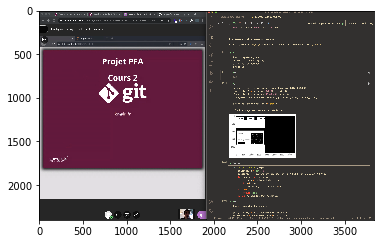

In [3]:
img = ImageGrab.grab()
screenshot = np.array(img)
plt.imshow(screenshot)
plt.show()

### 3 - Create a mask which extract only black pixels

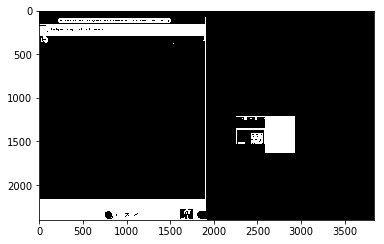

In [5]:
black_color_1 = np.array([0,0,0], np.uint8)
black_color_2 = np.array([45,45,45], np.uint8)
black_mask = cv.inRange(screenshot, black_color_1, black_color_2)

plt.imshow(black_mask, cmap='gray')
plt.show()

### 5 - Define a fonction which return the max rectangle

In [6]:
def get_max_contour(img):
    selected, m = None, 0
    contours, _ = cv.findContours(img, cv.RETR_CCOMP, cv.CHAIN_APPROX_NONE)
    for contour in contours:
        _,_,w,h = cv.boundingRect(contour)
        if w*h > m:
            selected, m = contour, w*h
    if m == 0:
        return None
    return cv.boundingRect(selected)

### 6 - Select the first main area

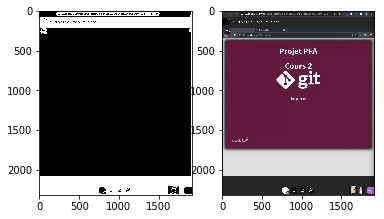

In [25]:
img = screenshot.copy()

(x1,y1,w1,h1) = get_max_contour(black_mask)
cropped_mask = black_mask[y1:y1+h1, x1:x1+w1]
cropped_screenshot = screenshot[y1:y1+h1, x1:x1+w1]

plt.subplot(1, 2, 1)
plt.imshow(cropped_mask, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(cropped_screenshot)
plt.show()

### 7 - Crop the main area to only keep usefull informations

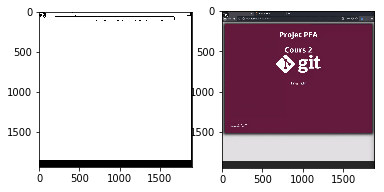

In [26]:
cropped_mask = cv.bitwise_not(cropped_mask)
(x2,y2,w2,h2) = get_max_contour(cropped_mask)
cropped_mask = cropped_mask[y2:y1+y2+h2, x2:x1+x2+w1]
final_screenshot = cropped_screenshot[y2:y1+y2+h2, x2:x1+x2+w2]

plt.subplot(1, 2, 1)
plt.imshow(cropped_mask, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(final_screenshot)
plt.show()